# Project 4 - Predicting Terrorism

In [2]:
import pandas as pd
import glob
import pandas as pd
import numpy as np

db = '/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv'
df = pd.read_csv(db, header=0,low_memory=False)
print 'Size = ',len(df)

Size =  156772


# I. EDA

In [2]:
def eda(dataframe):
    from IPython.core import display as ICD
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    ICD.display(pd.DataFrame(dataframe.isnull().sum()/len(df)*100),columns=['Columns','Pct Missing']), ## count number of null values per column
    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes),columns=['Columns','Dtype'])       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print '# unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

eda(df)

dataframe shape:  (156772, 137)

num duplicates: 0

pct missing values 



,0
eventid,0.000000
iyear,0.000000
imonth,0.000000
iday,0.000000
approxdate,96.966295
extended,0.000000
resolution,97.766183
country,0.000000
country_txt,0.000000
region,0.000000



dataframe types 



,0
eventid,int64
iyear,int64
imonth,int64
iday,int64
approxdate,object
extended,int64
resolution,object
country,int64
country_txt,object
region,int64



dataframe describe 



,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.567720e+05,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,152253.000000,152253.000000,156772.000000,...,1.195000e+03,4.110000e+02,6.230000e+02,402.000000,8685.000000,8095.000000,156772.000000,156772.000000,156772.000000,156772.000000
mean,2.000541e+11,2000.474083,6.484666,15.455215,0.041347,133.087401,6.970097,23.190988,24.210467,1.452632,...,3.320127e+06,5.454451e+05,4.319721e+05,305.196517,4.592170,-27.788635,-4.834645,-4.789114,0.093894,-4.221124
std,1.298283e+09,12.982397,3.392225,8.815533,0.199091,113.946290,2.967803,19.220723,59.900831,1.016971,...,3.187694e+07,6.665967e+06,2.589893e+06,3409.027685,2.049184,58.524976,4.528862,4.589779,0.602442,4.686143
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.989082e+11,1989.000000,4.000000,8.000000,0.000000,69.000000,5.000000,10.756961,-1.929857,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.005071e+11,2005.000000,6.000000,15.000000,0.000000,101.000000,6.000000,31.285506,41.919647,1.000000,...,1.250000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.013060e+11,2013.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.842222,68.416974,1.000000,...,4.115000e+05,0.000000e+00,4.276840e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.015123e+11,2015.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000



# unique values in series:



,Column,Num_unique
0,eventid,156772
1,iyear,45
2,imonth,13
3,iday,32
4,approxdate,1426
5,extended,2
6,resolution,2657
7,country,206
8,country_txt,206
9,region,12


#### Standardize Country Names to join Dataframes

In [3]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

df.country_txt.replace(fix_countries, inplace=True)

### Types of Attacks

In [4]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'

plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

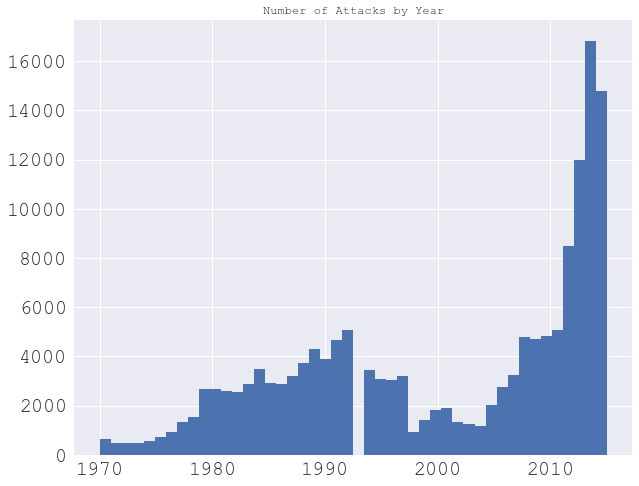

In [61]:
plt.hist(df.iyear,bins=46)
plt.title('Number of Attacks by Year')
plt.show()

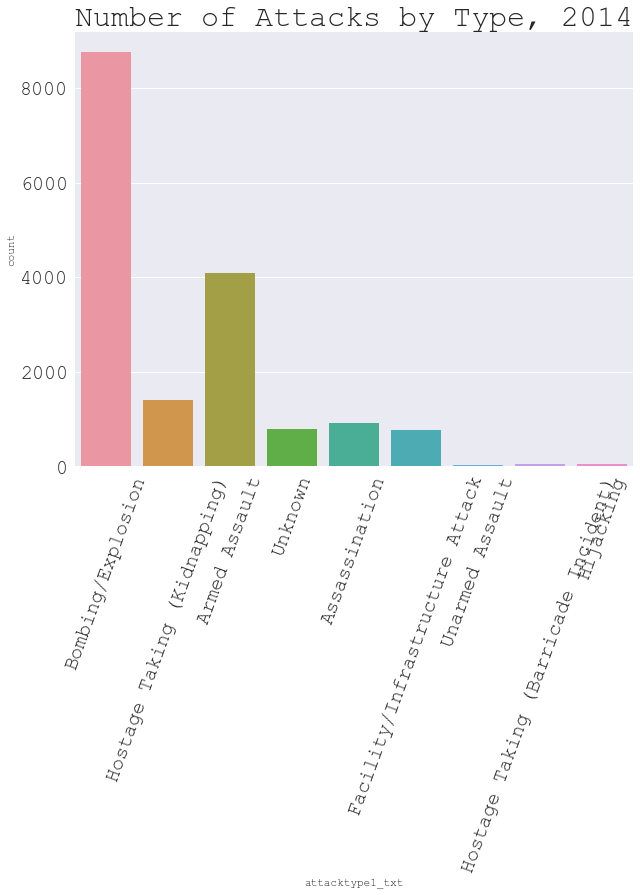

In [62]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
sns.countplot(x="attacktype1_txt", data=df[df.iyear==2014])
plt.title('Number of Attacks by Type, 2014',size=30)
plt.xticks(rotation=70)
plt.show()

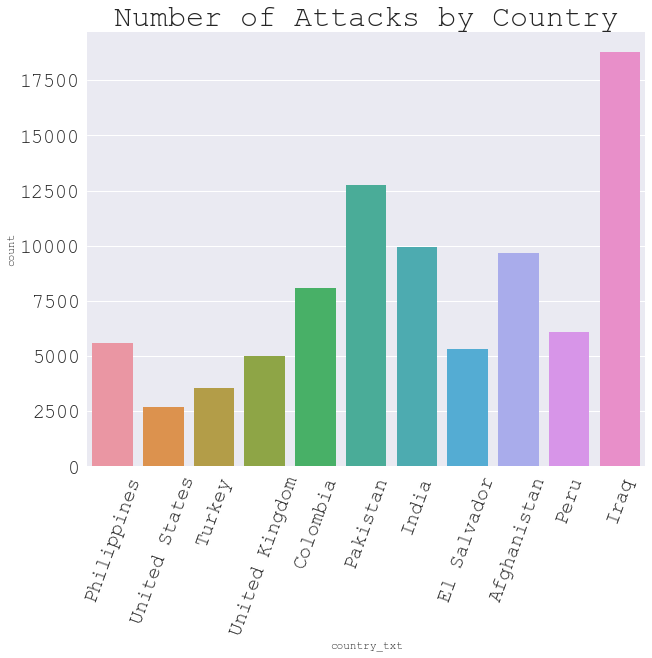

In [63]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df.groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[df.country_txt.isin(countries)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country',size=30)
plt.xticks(rotation=70)
plt.show()

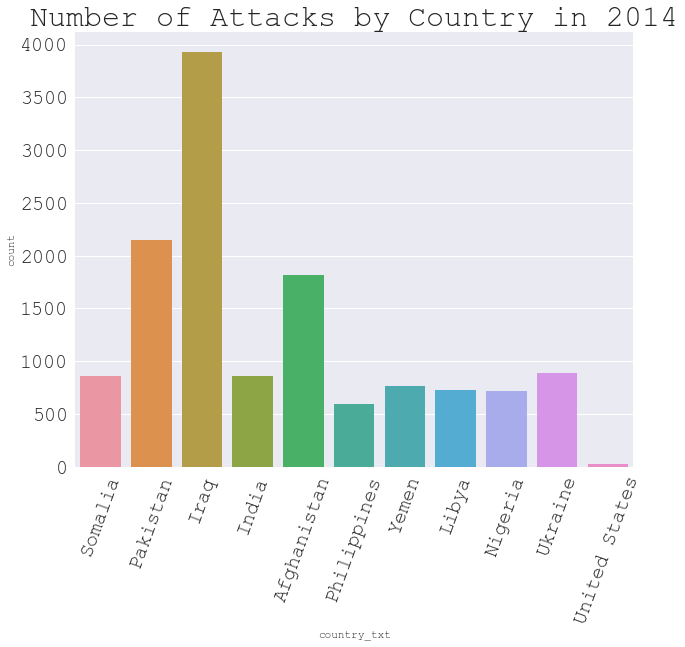

In [64]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df[df.iyear==2014].groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[(df.country_txt.isin(countries))&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

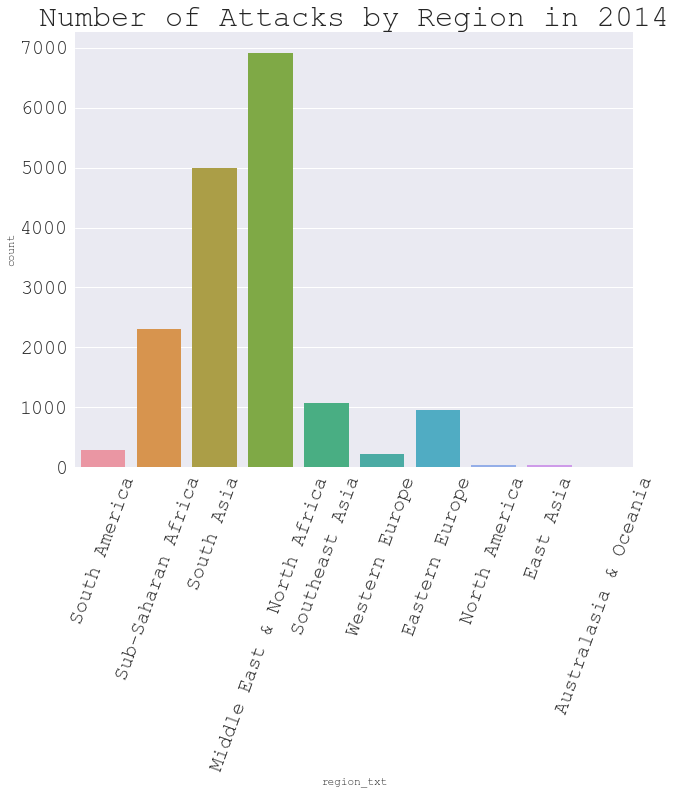

In [65]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
regions = df[df.iyear==2014].groupby(['region_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
regions = list(regions.region_txt)
mask = df[(df.region_txt.isin(regions))&(df.iyear==2014)]
sns.countplot(x="region_txt", data=mask)
plt.title('Number of Attacks by Region in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

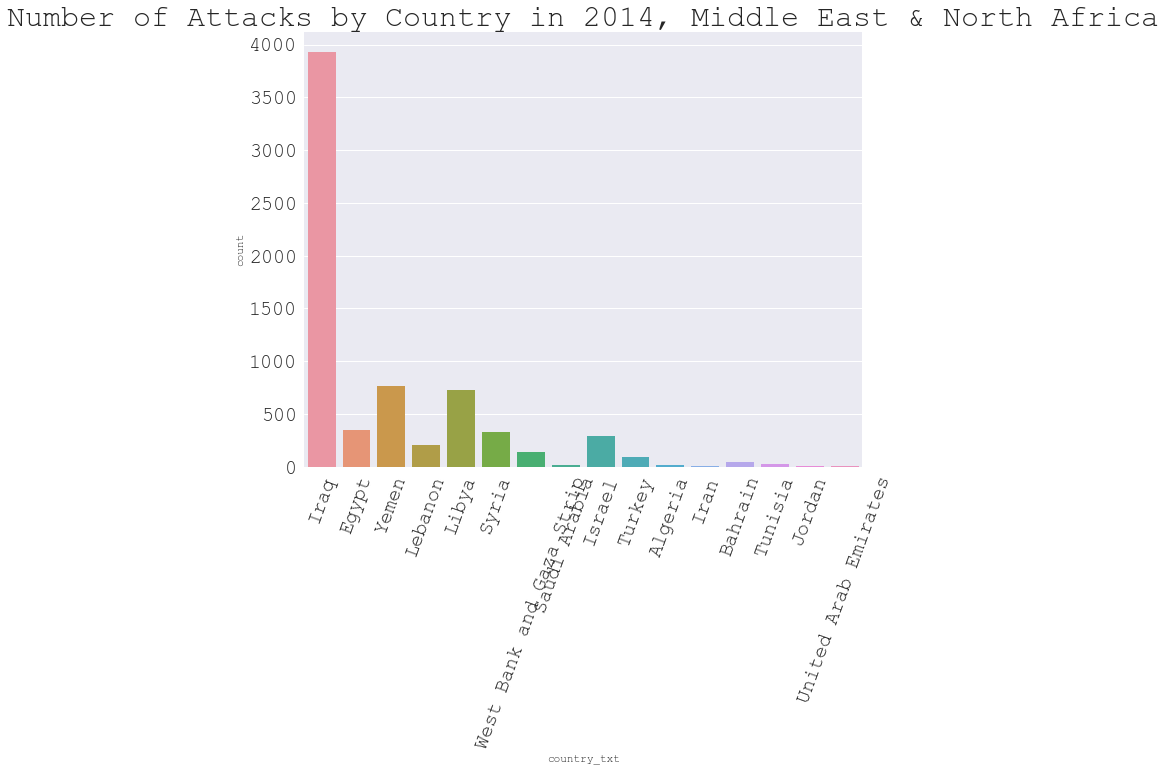

In [66]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
mask = df[(df.region_txt=='Middle East & North Africa')&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

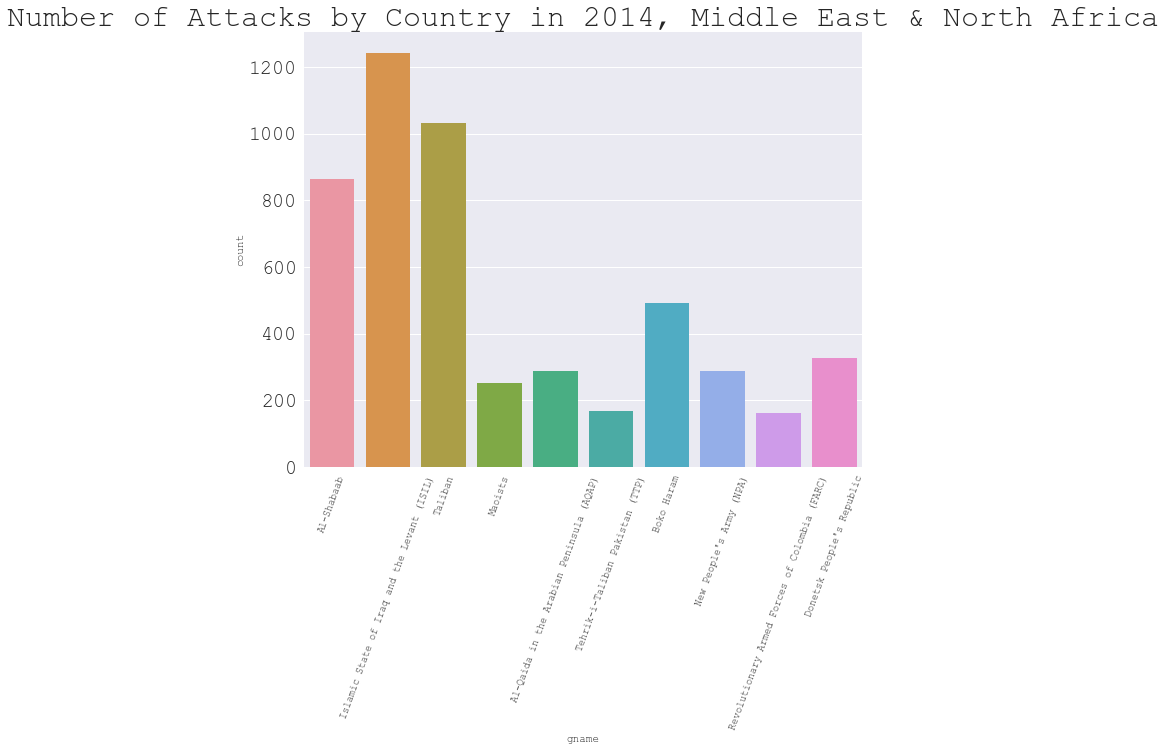

In [124]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 10 
plt.rcParams['ytick.labelsize'] = 20 
gnames = df[df.iyear==2014].groupby(['gname']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:11]
gnames = list(gnames.gname)[1:]
mask = df[(df.gname.isin(gnames))&(df.iyear==2014)]
sns.countplot(x="gname", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

In [12]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [102]:
df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]

In [7]:
types = pd.DataFrame(df_before[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_before'] = types.attacktype1+types.attacktype2+types.attacktype3
types = types[['attacktype1_txt','num_before']]
types['pct_before'] = types.num_before / len(df_before)


types_temp = pd.DataFrame(df_after[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_after'] =  types_temp.attacktype1+types_temp.attacktype2+types_temp.attacktype3
types['pct_after'] = types.num_after / len(df_after)

types['delta'] = types.pct_after - types.pct_before


total_suicide_before = df_before.suicide[df_before.suicide==1].sum()
total_suicide_after = df_after.suicide[df_after.suicide==1].sum()

types['suicide_before'] = pd.DataFrame(df_before[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_before'] = types['suicide_before'] / total_suicide_before
types['suicide_after'] = pd.DataFrame(df_after[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_after'] = types['suicide_after'] / total_suicide_after

types

,attacktype1_txt,num_before,pct_before,num_after,pct_after,delta,suicide_before,pct_suicide_before,suicide_after,pct_suicide_after
0,Armed Assault,1979,0.299395,5758,0.189371,-0.110024,0,0.000000,4,0.001599
1,Assassination,1509,0.228290,1869,0.061468,-0.166822,2,0.032787,68,0.027189
2,Bombing/Explosion,2275,0.344175,20232,0.665395,0.321219,57,0.934426,2403,0.960816
3,Facility/Infrastructure Attack,346,0.052345,511,0.016806,-0.035539,0,0.000000,0,0.000000
4,Hijacking,28,0.004236,54,0.001776,-0.002460,0,0.000000,1,0.000400
5,Hostage Taking (Barricade Incident),13,0.001967,77,0.002532,0.000566,0,0.000000,13,0.005198
6,Hostage Taking (Kidnapping),236,0.035703,1958,0.064395,0.028692,0,0.000000,12,0.004798
7,Unarmed Assault,72,0.010893,70,0.002302,-0.008590,0,0.000000,0,0.000000
8,Unknown,234,0.035401,830,0.027297,-0.008104,2,0.032787,0,0.000000


In [254]:
suicides_by_year = pd.DataFrame(df[['iyear','suicide']][df.attacktype1_txt=='Bombing/Explosion'].groupby('iyear').suicide.sum()).reset_index('suicide')
suicides_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.attacktype1_txt=='Bombing/Explosion')&(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.sum()).reset_index('suicide')
attacks_by_year = pd.DataFrame(df[['iyear','suicide']].groupby('iyear').suicide.count()).reset_index('suicide')
attacks_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')

suicides_by_year_middle_east.set_index('iyear',inplace=True)
suicides_by_year.set_index('iyear',inplace=True)
attacks_by_year_middle_east.set_index('iyear',inplace=True)
attacks_by_year.set_index('iyear',inplace=True)

df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]

before_middle_east = pd.DataFrame(df_before[['iyear','suicide']][(df_before.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
after_middle_east = pd.DataFrame(df_after[['iyear','suicide']][(df_after.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
before_middle_east.set_index('iyear',inplace=True)
after_middle_east.set_index('iyear',inplace=True)

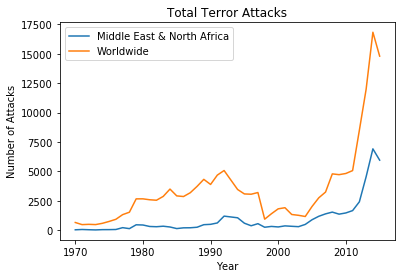

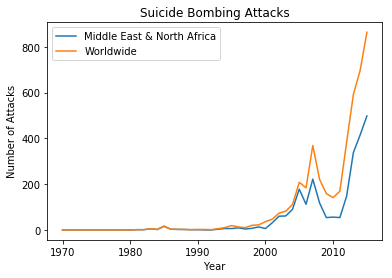

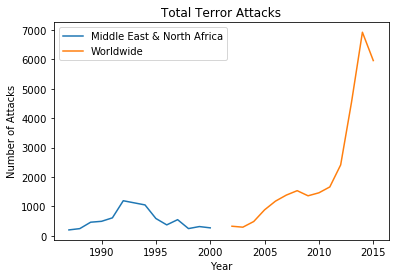

In [255]:
from matplotlib import pyplot as plt


plt.plot(attacks_by_year_middle_east, label="Middle East & North Africa")
plt.plot(attacks_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()

plt.plot(suicides_by_year_middle_east, label="Middle East & North Africa")
plt.plot(suicides_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Suicide Bombing Attacks')
plt.legend()
plt.show()

plt.plot(before_middle_east, label="Middle East & North Africa")
plt.plot(after_middle_east, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()

# II. Bayesian Inference

I'm going to compare the number of suicide bombings/explosions before and after 9/11. Although 9/11 is classified as 'Hijaking,' it involved suicide of the terrorists. I'm interested to see if the huge attack had any impact on the number of suicide bombings by comparing 10 years before 9/11 and 10 years after 9/11.

In [289]:
# PRIOR = suicide attacks BEFORE 9/11
# predict after 9/11

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# create sub df containing the number of suicide attacks in the middle east & north africa
bayes_before = df_before[['iyear',
                      'eventid']][(
    df_before.region_txt=='Middle East & North Africa')&(
    df_before.suicide==1)].groupby('iyear').eventid.count().reset_index()

bayes_before.rename(columns={'eventid':'num_attacks'},inplace=True)

# set up bayesian model and priors on means
mean_prior_mean = bayes_before.num_attacks.mean()
mean_prior_std = bayes_before.num_attacks.std()

# set up normal distributions
with pm.Model() as model:

    before_mean = pm.Normal('APM_19yo_mean', mean_prior_mean, sd=mean_prior_std)

In [ ]:
# priors on standard deviations
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    group19_std = pm.Uniform('APM_19yo_std', lower=std_prior_lower, upper=std_prior_upper)
    group26_std = pm.Uniform('APM_26yo_std', lower=std_prior_lower, upper=std_prior_upper)
    
    


In [262]:
from __future__ import division
import numpy as np
import scipy.stats as stats
##### BEFORE 9/11


###
### QUESTION: How do the number of suicide attacks compare from before and after 9/11?
### As this was one of the deadliest attacks in hugely populated areas of the US, and 
### was broadly publicized, I would assume that the number of suicide attacks would increase
### in part to maybe it being 'popularized' or to increase radicalism
###


# number of terror attacks in the middle east in the 14 years before 9/11
num_middle_east = len(df_before[df_before.region_txt=='Middle East & North Africa'])
# number of suicide terror attacks in the middle east in the 14 years before 9/11
num_me_sui = len(df_before[(df_before.region_txt=='Middle East & North Africa')&(df_before.suicide==1)])

# prior: probability of a terror attack in the middle east in the 14 years before 9/11
prior_before = num_middle_east / len(df)
# likelihood: given that there's a terror attack in the 14 years before 9/11, what's the probability that it's a suicide?
likelihood_before = num_me_sui / num_middle_east


##### AFTER 9/11

# number of terror attacks in the middle east in the 14 years after 9/11
num_middle_east = len(df_after[df_after.region_txt=='Middle East & North Africa'])
# number of suicide terror attacks in the middle east in the 14 years after 9/11
num_me_sui = len(df_after[(df_after.region_txt=='Middle East & North Africa')&(df_after.suicide==1)])

# prior: probability of a terror attack in the middle east in the 14 years after 9/11
prior_after = num_middle_east / len(df)
# likelihood: given that there's a terror attack in the 14 years after 9/11, what's the probability that it's a suicide?
likelihood_after = num_me_sui / num_middle_east


######

marginal = likelihood_before*prior_before + likelihood_after*prior_after

posterior_before = likelihood_before*prior_before / marginal
posterior_after = likelihood_after*prior_after / marginal

# probability that there's a suicide attack, given that it's either before or after 9/11
posterior_before, posterior_after

(0.02380952380952381, 0.9761904761904763)

In [253]:
import scipy.stats as stats

yearly = df[['Date','attacktype1','attacktype1_txt']][(df.attacktype1==3)].groupby(['Date','attacktype1']).attacktype1_txt.count().reset_index()
yearly.rename(columns={'attacktype1_txt':'num_attacks'},inplace=True)
yearly.drop(['attacktype1'],axis=1,inplace=True)

#converting 'date' column to a datetime type
yearly['Date'] = pd.to_datetime(yearly['Date'])
# resetting date back to the index
yearly.set_index('Date',inplace = True)

print stats.bayes_mvs(yearly.num_attacks, alpha=0.95)

(Mean(statistic=1688.0666666666666, minmax=(1130.2970952660439, 2245.8362380672893)),
 Variance(statistic=3610912.8285714281, minmax=(2362225.6460802564, 5499935.7090681987)),
 Std_dev(statistic=1888.9639077527158, minmax=(1536.9533649659825, 2345.1941729989439)))

In [271]:
from __future__ import division

by_region = df_before[['region_txt','attacktype1']].groupby(['region_txt']).attacktype1.count()
xbar = by_region.mean(); xbar

q = prior_before
n = len(df)
z = (xbar - q) * np.sqrt(n / (q*(1-q)))
pval = 2 * (1 - stats.norm.cdf(z))
print q, n, z, pval

0.0421631413773 156772 6864114.17731 0.0


In [270]:
by_region = df_after[['region_txt','attacktype1']].groupby(['region_txt']).attacktype1.count()
xbar = by_region.mean(); xbar

q = prior_after
n = len(df)
z = (xbar - q) * np.sqrt(n / (q*(1-q)))
pval = 2 * (1 - stats.norm.cdf(z))

print q, n, z, pval

0.193950450336 156772 6950195.72101 0.0


# III. Impute 1993 Values

#### Set all dates to Jan 1st of respective year -- I found that this was the only way I could get the ARMA model to work

In [74]:
# Compile list of new dates
dates = []
for i in range(0,len(df)):
    dates.append(str(df.iyear.loc[i])+'-01-01')

# Add Date series to df
# df.drop('Date',axis=1,inplace=True)
df['Date'] = pd.Series(dates)
df.Date = pd.to_datetime(df.Date)

#### Create sub-df, grouping by year to get annual counts of terror attacks

In [148]:
impute = df[['Date','attacktype1','attacktype1_txt']][(df.attacktype1==3)&(df.iyear<=1992)].groupby(['Date','attacktype1']).attacktype1_txt.count().reset_index()
impute.rename(columns={'attacktype1_txt':'num_attacks'},inplace=True)
impute.drop(['attacktype1'],axis=1,inplace=True)

#converting 'date' column to a datetime type
impute['Date'] = pd.to_datetime(impute['Date'])
# resetting date back to the index
impute.set_index('Date',inplace = True)

                              ARMA Model Results                              
Dep. Variable:            num_attacks   No. Observations:                   23
Model:                     ARMA(1, 0)   Log Likelihood                -154.929
Method:                       css-mle   S.D. of innovations            193.289
Date:                Mon, 08 May 2017   AIC                            315.858
Time:                        23:09:40   BIC                            319.264
Sample:                    01-01-1970   HQIC                           316.715
                         - 01-01-1992                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1036.9474    532.176      1.949      0.065      -6.099    2079.994
ar.L1.num_attacks     0.9552      0.048     19.963      0.000       0.861       1.049
                        

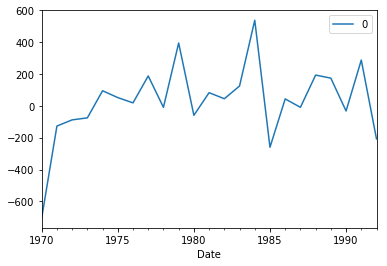

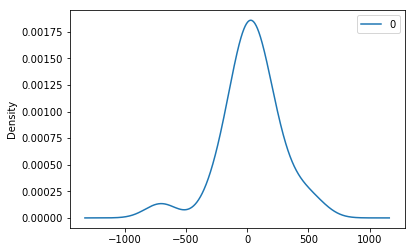

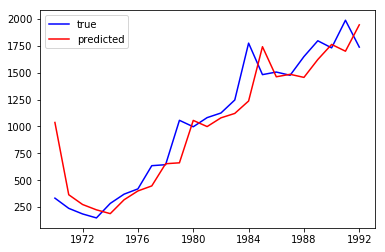

                0
count   23.000000
mean    29.227172
std    242.313101
min   -703.947413
25%    -67.130301
50%     43.957914
75%    149.720161
max    538.374743


In [246]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# fit model
impute.num_attacks = impute.num_attacks.astype(float)
model = ARMA(impute, order=(1,0))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
plt.plot(impute,color='blue',label='true')
plt.plot(model_fit.fittedvalues, color='red',label='predicted')
plt.legend()
plt.show()
print(residuals.describe())

#### Predict 1993 number of terror attacks

In [247]:
# get what you need for predicting one-step ahead
params = model_fit.params
residuals = model_fit.resid
p = model_fit.k_ar
q = model_fit.k_ma
k_exog = model_fit.k_exog
k_trend = model_fit.k_trend
steps = 1

_arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=impute, exog=None, start=len(impute))


array([ 1706.56203623])

# IV. Visualizations

In [20]:
bombings = df[['iyear','country_txt','latitude','longitude','attacktype1_txt']][df.attacktype1_txt=='Bombing/Explosion']
bombings = bombings.groupby(['iyear','country_txt','latitude','longitude']).attacktype1_txt.count().reset_index()

In [ ]:
bombings = bombings.merge(world[['name','geometry','iso_a3','pop_est']],how='left', left_on='country_txt', right_on='name').drop('name',axis=1)

In [ ]:
bombings.dropna(inplace=True)
type(bombings)

In [ ]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import pysal

# geo stuff
import geopandas as gpd
from shapely.geometry import Point
# from ipyleaflet import (Map,
#     Marker,
#     TileLayer, ImageOverlay,
#     Polyline, Polygon, Rectangle, Circle, CircleMarker,
#     GeoJSON,
#     DrawControl
# )

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20.0, 20.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pysal
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
terror = pd.read_csv('/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv')


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

terror.country_txt.replace(fix_countries, inplace=True)


terror_grouped = terror.groupby('country_txt').count().reset_index()
terror_grouped = terror_grouped[['country_txt','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')

q10 = pysal.Quantiles(world_terror.Num_Tattacks,k=10)
f, ax = plt.subplots(1, figsize=(20,10))
world_terror.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
ax.set_axis_off()
plt.show()

# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html

In [ ]:
def make_plot(year=1970):

    # filter dataframe
    temp = world_terror[world_terror['iyear']==year]
    
    q10 = pysal.Quantiles(temp.Num_Tattacks,k=10)
    f, ax = plt.subplots(1, figsize=(20,10))
    temp.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
    ax.set_axis_off()
    plt.show()

In [ ]:
terror_grouped = terror[terror.attacktype1_txt=='Bombing/Explosion'].groupby(['country_txt','iyear']).count().reset_index()
terror_grouped = terror_grouped[['country_txt','iyear','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')



# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html





# create widget
interact(make_plot, year=(1970, 2015, 1))


